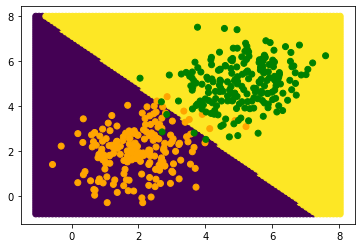

Accuracy :  89.55223880597015


In [145]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

class LogitRegression() :
    def __init__(self, learning_rate, iterations) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
              
    def fit(self, X, Y) :              
        self.m, self.n = X.shape       
        self.W = np.zeros(self.n)        
        self.b = 0        
        self.X = X        
        self.Y = Y
        
        for i in range(self.iterations) :            
            self.update_weights()            
        return self      
      
    def update_weights(self) :           
        A = 1/(1 + np.exp(-(self.X.dot(self.W)+self.b)))
                 
        tmp = (A-self.Y.T)        
        tmp = np.reshape(tmp, self.m)        
        dW = np.dot(self.X.T, tmp)/self.m         
        db = np.sum(tmp)/self.m 
            
        self.W = self.W-self.learning_rate*dW    
        self.b = self.b-self.learning_rate*db
          
        return self
      
    def predict(self, X) :
        X = np.array(X, dtype=np.float64)
        Z = 1/(1+np.exp(-(X.dot(self.W)+self.b)))        
        Y = np.where(Z>0.5, 1, 0)        
        return Y
    
num_observations = 200
X = np.random.multivariate_normal([2, 2], [[1, .2],[.2, 1]], num_observations)
Y = np.random.multivariate_normal([5, 5], [[1, .2],[.2, 1]], num_observations)

X_train = np.vstack((X, Y)).astype(np.float32)
Y_train = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)


model = LogitRegression(learning_rate=0.01, iterations=20000)

model.fit(X_train, Y_train) 

Y_pred = model.predict(X_test) 

xmin = X_train[:,0].min()-0.5
xmax = X_train[:,0].max()+0.5
x = np.arange(xmin,xmax,0.1)

ymin = X_train[:,1].min()-0.5
ymax = X_train[:,1].max()+0.5
y = np.arange(ymin,ymax,0.1)

xx,yy = np.meshgrid(x,y)
X_test = np.c_[xx.flatten(),yy.flatten()]
 

Y_pred = model.predict(X_test) 

cmap1 = ListedColormap(['orange','green'])
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=cmap1)
plt.scatter(X_test[:,0],X_test[:,1], c=Y_pred)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=cmap1)
plt.show()

correctly_classified = 0          
count = 0 
for count in range(np.size(Y_pred)) :
    if X_test[:,1][count] == Y_pred[count] :            
        correctly_classified = correctly_classified + 1            
    count = count + 1

print( "Accuracy :", ( 
      correctly_classified/count )*100)